<a href="https://colab.research.google.com/github/basel5621/Vegetable-Image-Classification/blob/main/Vegetables_CNN_with_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'vegetable-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1817999%2F2965251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240920%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240920T063558Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D35b1d124237a8aa7206c98205b32fd1a4f12b0d6c0d8c7f1f34ef310d6ba560b7f2f974f076e839a18da07fc4198ecdd103d62ecd6bb928c63d7c76d861b7a257ab52f9d087017ecb06497566b7366fccc071038aa1c16ee8a23a7be8f6031c3b627a8dbaba7f8e8b7d2f5416353fa2191f032f1ddd5fadf279618ac842860cb52dc1c01f4030e7ad551afd36d520b5db3a857820241102c05ebf79ec4967abe0110bd84c49d3ab4c5df5a71cbc3b8df44084996aedcc36bc13a2ffdce6ffc5f6684c2d92af29a36895faaa7b485e6520711e8d7ff7987e38e037c16a23638aa6a0cdfae3a89f196de2b0daedaf68fbec11f86fc1a7ba0b83a1353f7439f9a11'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 560031432 bytes downloaded
Downloaded and uncompressed: vegetable-image-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0111.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0428.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0056.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0688.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0374.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0829.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0264.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0055.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0049.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0036.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0991.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Radish/0401.jpg
/kaggle/input/vegetable-i

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dataset_path='/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
validation_dataset_path='/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'
test_datapath='/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 32

In [4]:
from tensorflow.keras.applications.mobilenet import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.1,
    rotation_range=10,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


Found 15000 images belonging to 15 classes.


In [12]:
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_generator = valid_datagen.flow_from_directory(
    validation_dataset_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_datapath,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [6]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bean
1 : Bitter_Gourd
2 : Bottle_Gourd
3 : Brinjal
4 : Broccoli
5 : Cabbage
6 : Capsicum
7 : Carrot
8 : Cauliflower
9 : Cucumber
10 : Papaya
11 : Potato
12 : Pumpkin
13 : Radish
14 : Tomato


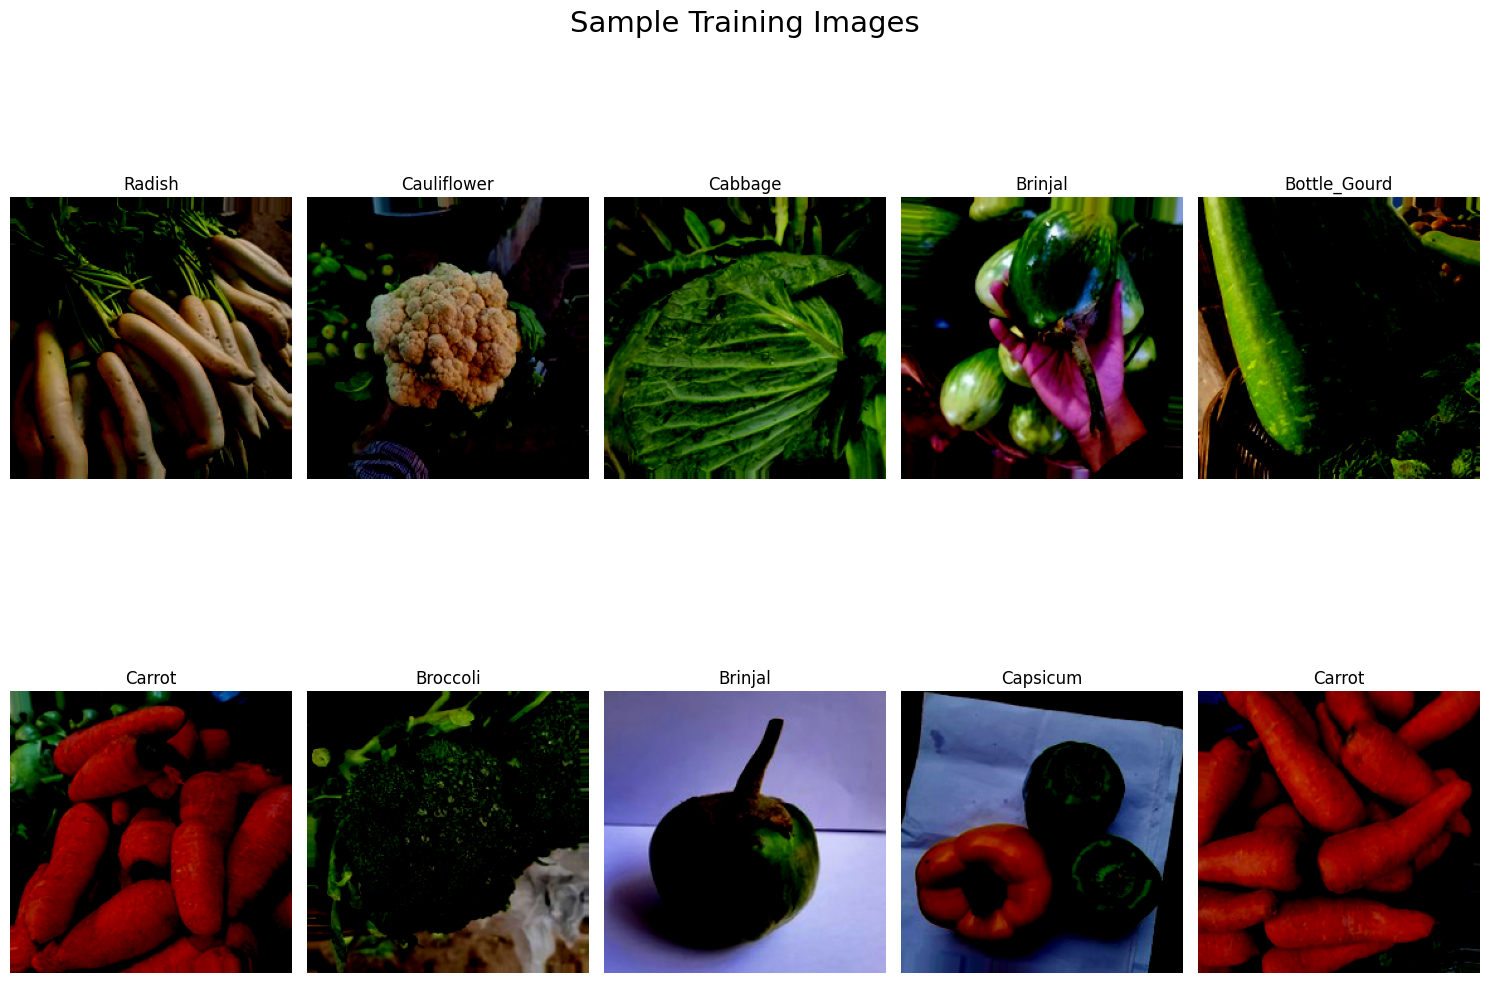

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

# Using transfer learning with MobileNet

In [14]:
from tensorflow.keras.applications.mobilenet import MobileNet
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the layers


In [15]:
x = base_model.output
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)


In [16]:
transfer_model = Model(inputs=base_model.input, outputs=predictions)
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 12,682,447 (48.38 MB)

 Trainable params: 9,453,583 (36.06 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [17]:
history=transfer_model.fit(train_generator, epochs=10, validation_data=valid_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 418ms/step - accuracy: 0.8578 - loss: 3.7222 - val_accuracy: 0.9883 - val_loss: 0.0565
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 241s 387ms/step - accuracy: 0.9863 - loss: 0.0525 - val_accuracy: 0.9927 - val_loss: 0.0292
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 216s 419ms/step - accuracy: 0.9920 - loss: 0.0370 - val_accuracy: 0.9893 - val_loss: 0.0734
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 180s 380ms/step - accuracy: 0.9947 - loss: 0.0295 - val_accuracy: 0.9943 - val_loss: 0.0317
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 379ms/step - accuracy: 0.9907 - loss: 0.0563 - val_accuracy: 0.9893 - val_loss: 0.0909
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 184s 387ms/step - accuracy: 0.9923 - loss: 0.0396 - val_accuracy: 0.9910 - val_loss: 0.0855
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 182s 383ms/step - accuracy: 0.9928 - loss: 0.0533 - val_accuracy: 0.9927 - val_loss: 0.0977
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 185s 390ms/step - accuracy: 0.9941 - loss: 0.03

<Axes: >

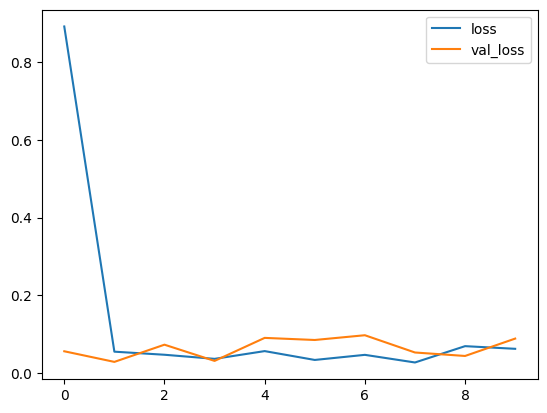

In [18]:
import pandas as pd
df_his=pd.DataFrame(history.history)
df_his[['loss','val_loss']].plot()

<Axes: >

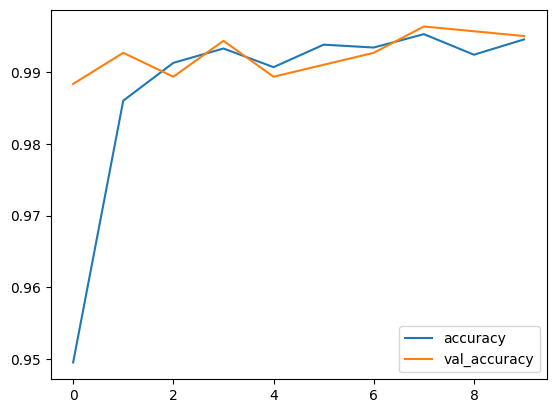

In [19]:
df_his[['accuracy','val_accuracy']].plot()

In [21]:
predictions = transfer_model.predict(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step


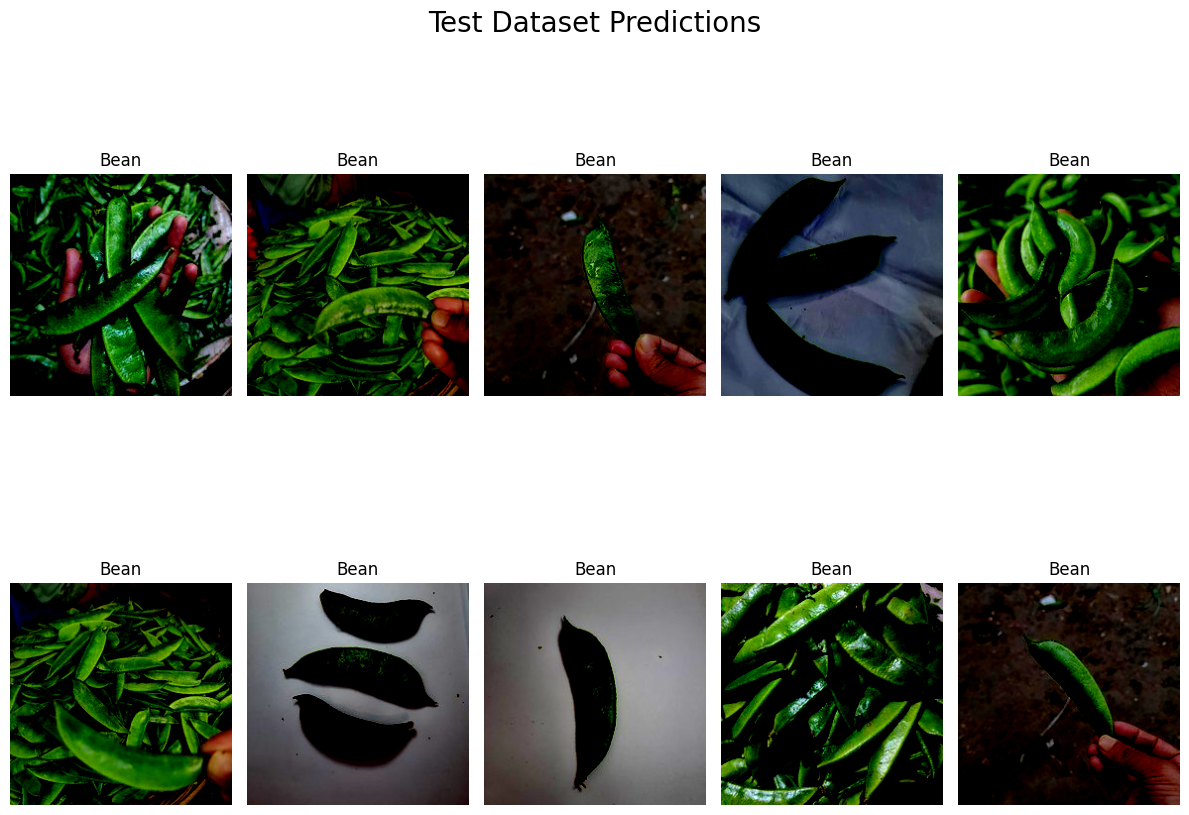

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [24]:
test_loss, test_accuracy = transfer_model.evaluate(test_generator, batch_size=BATCH_SIZE)

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9907 - loss: 0.1086


In [25]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.09838927537202835
Test Accuracy: 0.9919999837875366


In [26]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

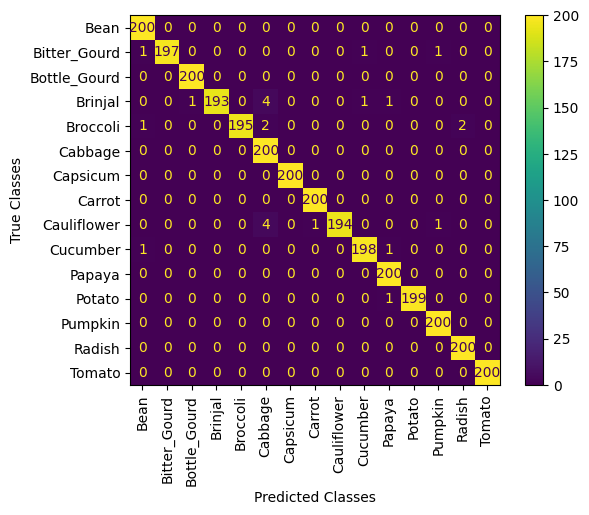

In [29]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp=ConfusionMatrixDisplay(cm ,display_labels= labels.values())
disp.plot()
plt.xticks(rotation=90)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [30]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

        Bean       0.99      1.00      0.99       200
Bitter_Gourd       1.00      0.98      0.99       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       1.00      0.96      0.98       200
    Broccoli       1.00      0.97      0.99       200
     Cabbage       0.95      1.00      0.98       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       1.00      0.97      0.98       200
    Cucumber       0.99      0.99      0.99       200
      Papaya       0.99      1.00      0.99       200
      Potato       1.00      0.99      1.00       200
     Pumpkin       0.99      1.00      1.00       200
      Radish       0.99      1.00      1.00       200
      Tomato       1.00      1.00      1.00       200

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99   

In [31]:
transfer_model.save('transfer_model_vegetables_CNN.keras')

In [32]:
df_his.to_csv("transfer_model_vegetables_CNN_history.csv")